In [1]:
import cv2
import numpy as np
from IPython.display import Image

In [2]:
# 이미지 읽기.
# img = cv2.imread('opencv_data/image/marathon_01.jpg')
img = cv2.imread('opencv_data/image/marathon_02.jpg')
# img = cv2.imread('opencv_data/image/marathon_03.jpg')
# img = cv2.imread('opencv_data/image/soccer_01.jpg')
cv2.imshow('Original Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 이미지 정보.
print(f'height   : {img.shape[0]}')
print(f'width    : {img.shape[1]}')
print(f'channels : {img.shape[2]}')

height   : 206
width    : 244
channels : 3


In [4]:
# Haar Classifier 사용을 위한 cascade 파일.
# Haar Object detection은 학습을 통해 구해진 가중치와 레이어의 구조가 정의되어 있는 파일을 불러와 사물을 인식하는 형태로 동작.
# 즉, 학습과정은 존재하지 않고 작업속도가 바르지만 인지하지 못하는 사물들이 존재할 수 있음.

face_cascade_name = 'opencv_data/haarcascades/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'opencv_data/haarcascades/haarcascade_eye_tree_eyeglasses.xml'

# casecadeClassifier 생성.
face_cascade = cv2.CascadeClassifier()
eyes_cascade= cv2.CascadeClassifier()

# 각 분류기에 cascade 파일을 지정.
face_cascade.load(cv2.samples.findFile(face_cascade_name))
eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name))

# 인지율을 높이기 위해 사용할 이미지를 그레이 스케일로 변환.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 인식률 향상을 위해 이미지 표준화.
gray = cv2.equalizeHist(gray)

# cv2.imshow('Face detection', gray)
# cv2.waitKey()
# cv2.destroyAllWindows()

# Face 인식.
# 인식된 부분은 이미지 상의 좌축 상단 지점 x, y 좌표와 가로 세로 길이로 반환.
faces = face_cascade.detectMultiScale(gray)
# 세로 가로 위치, 세로 가로 크기.
# print(faces) ㅡ

# 인식한 얼굴의 수 만큼 반복.
for x, y, w, h in faces :
    
    # 인식한 얼굴을 사각형으로 그려줌.
    # 이미지, 네모의 좌측 상단점, 네무의 우측 하단점, 색상, 두께
    frame = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    
    # 눈을 찾기 위해 얼굴 데이터만을 가져옴.
    faceROI = gray[y:y+h, x:x+w]
    
    # 추출한 얼굴 데이터로부터 눈을 인식.
    eyes = eyes_cascade.detectMultiScale(faceROI)
    # print(eyes)
    
    # 인식한 눈을 동그라미로 표시. 
    for x2, y2, w2, h2 in eyes :
        
        # 눈의 중심점.
        eye_center = x + x2 + w2//2, y + y2 + h2//2
        
        # 반경을 계산.
        radius = int(round(w2+h2)*.25)
        
        # 원을 그림.
        frame = cv2.circle(img, eye_center, radius, (0, 0, 255), 3)
        
cv2.imshow('Detection', frame)
cv2.waitKey()
cv2.destroyAllWindows()

# Haar 분류기로는 작은 눈을 잘 못 찾는 단점이 존재.
# 직접 학습 시킨 모델을 적용시켜 볼 필요도 있어보임.

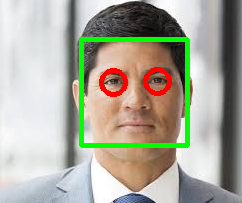

In [5]:
Image('opencv_image/19.1.PNG')

In [6]:
# 영상 파일 읽기.
file = 'opencv_data/video/obama_01.mp4'
# file = 'opencv_data/video/son_01.mp4'
# file = 'opencv_data/video/son_02.mp4'
# file = 'opencv_data/video/tedy_01.mp4'
cap = cv2.VideoCapture(file)

In [7]:
while True :
    # 영상 프레임 읽기.
    ret, frame = cap.read()
    # print(frame)
    
    # 더 이상 읽어온 영상이 없다면 중단.
    if frame is None :
        break

    # 추출한 이미지를 그레이 스케일.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 그레이 스케일 이미지 표준화.
    gray =cv2.equalizeHist(gray)
    
    # 얼굴 인식.
    faces = face_cascade.detectMultiScale(gray)
    # print(faces)
    
    for x, y, w, h in faces :
    
        # 인식한 얼굴을 사각형으로 그려줌.
        # 이미지, 네모의 좌측 상단점, 네무의 우측 하단점, 색상, 두께
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)

        # 눈을 찾기 위해 얼굴 데이터만을 가져옴.
        faceROI = gray[y:y+h, x:x+w]

        # 추출한 얼굴 데이터로부터 눈을 인식.
        eyes = eyes_cascade.detectMultiScale(faceROI)
        # print(eyes)
    
        # 인식한 눈을 동그라미로 표시. 
        for x2, y2, w2, h2 in eyes :

            # d원의 중심점.
            eye_center = x + x2 + w2//2, y + y2 + h2//2

            # 반경을 계산.
            radius = int(round(w2+h2)*.25)

            # 원을 그림.
            frame = cv2.circle(frame, eye_center, radius, (0, 0, 255), 3)

    # 표현.
    cv2.imshow('Face detection', frame)
    
    # q키를 누르면 중단.
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
        
cv2.destroyAllWindows()

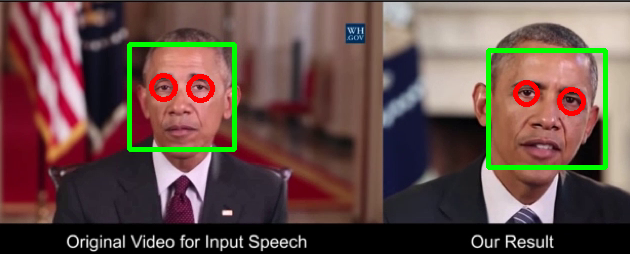

In [8]:
Image('opencv_image/19.2.PNG')